In [1]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import GRU
import tensorflow as tf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot  as plt

%matplotlib inline

2023-05-17 04:42:32.674031: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 04:42:32.912765: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-17 04:42:33.664559: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/rugewit/anaconda3/envs/tf2/lib/
2023-05-17 04:42:33.664637: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plug

Загрузка датасета

In [2]:
df = pd.read_csv('AirPassengers.csv')

Описание

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")

df.rename(columns={'#Passengers':'Passengers'}, inplace=True)

df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


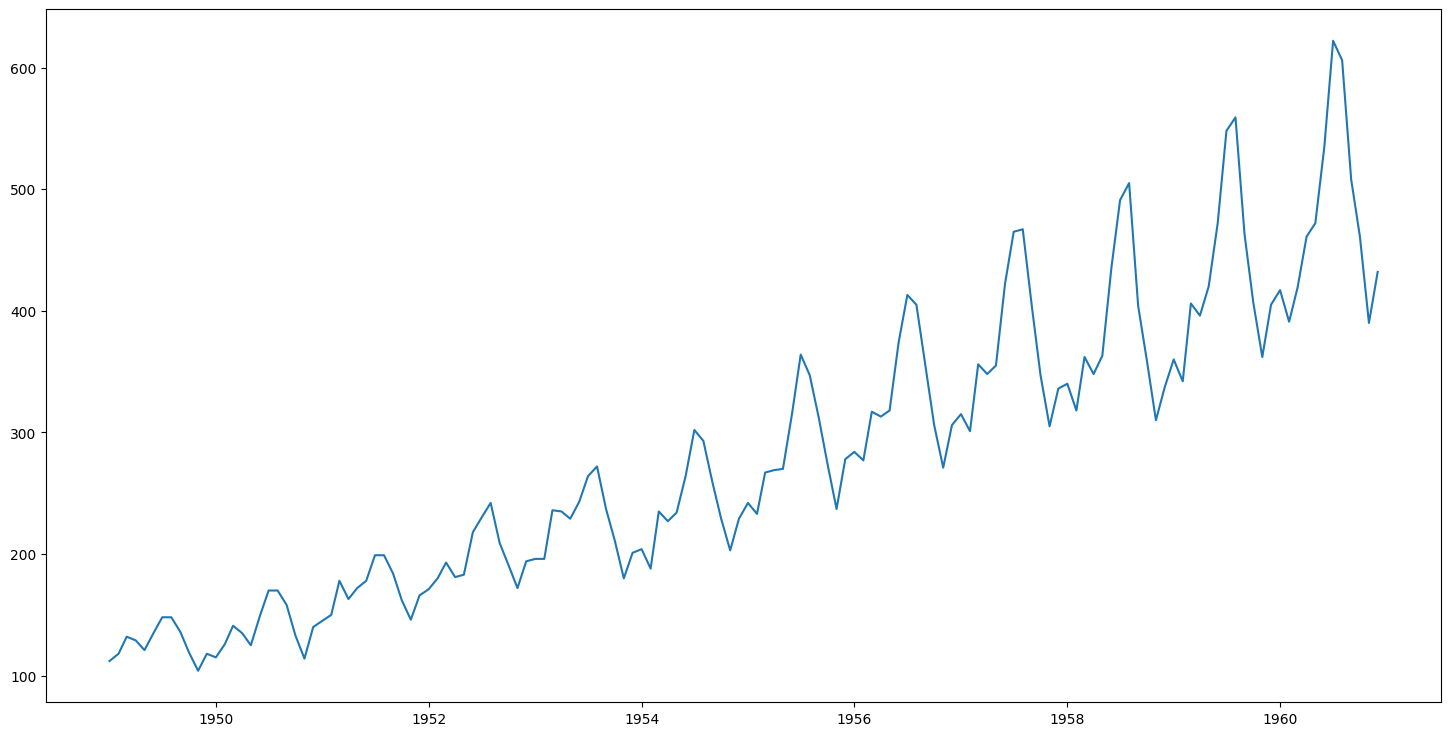

In [6]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Passengers"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show();

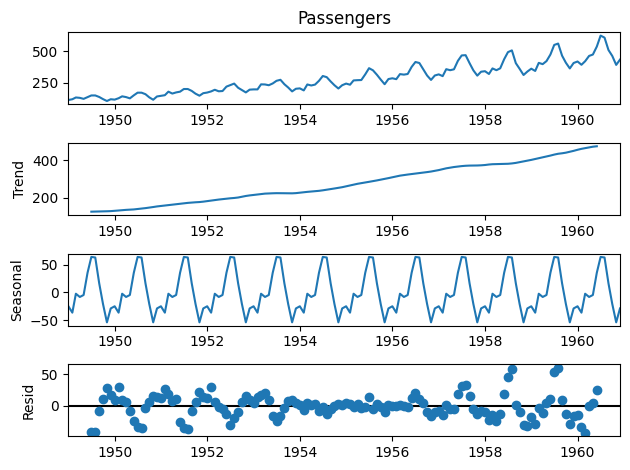

In [7]:
a = seasonal_decompose(df["Passengers"], model = "add")
a.plot();

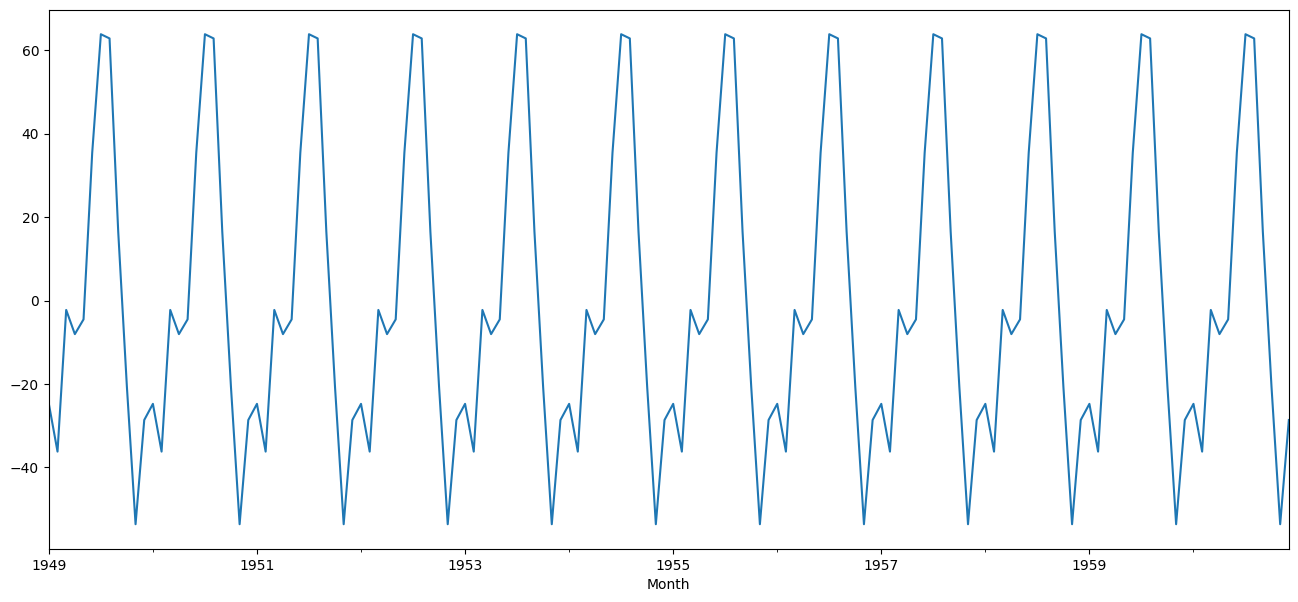

In [8]:
plt.figure(figsize = (16,7))
a.seasonal.plot();

p-value

In [9]:
adf_test = adfuller(df["Passengers"])
print('p-value = ' + str(adf_test[1]))

if adf_test[1] > 0.05:
    print('it is not a stationary process')
else:
    print('it is a stationary process')

p-value = 0.991880243437641
it is not a stationary process


ARIMA

In [10]:
train_data = df[:len(df)-12]
print(train_data)
test_data = df[len(df)-12:]

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1959-08-01         559
1959-09-01         463
1959-10-01         407
1959-11-01         362
1959-12-01         405

[132 rows x 1 columns]


In [11]:
arima_model = SARIMAX(train_data['Passengers'], order = (2,1,1), seasonal_order = (4,0,3,12))
#arima_model = ARIMA(train_data['Passengers'], order=(5,1,0))
arima_result = arima_model.fit()
arima_result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.70823D+00    |proj g|=  7.02519D-01


 This problem is unconstrained.



At iterate    5    f=  4.38661D+00    |proj g|=  2.78042D-02

At iterate   10    f=  4.15911D+00    |proj g|=  9.12162D-02

At iterate   15    f=  4.07261D+00    |proj g|=  4.65900D-02

At iterate   20    f=  3.85436D+00    |proj g|=  7.56852D-02

At iterate   25    f=  3.80853D+00    |proj g|=  3.30651D-02

At iterate   30    f=  3.80210D+00    |proj g|=  7.34350D-03

At iterate   35    f=  3.79844D+00    |proj g|=  1.01448D-02

At iterate   40    f=  3.79799D+00    |proj g|=  4.20818D-03

At iterate   45    f=  3.79520D+00    |proj g|=  1.56864D-02

At iterate   50    f=  3.79071D+00    |proj g|=  1.74851D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                 Passengers   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood                -500.374
Date:                                    Wed, 17 May 2023   AIC                           1022.748
Time:                                            04:42:43   BIC                           1054.375
Sample:                                        01-01-1949   HQIC                          1035.599
                                             - 12-01-1959                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6856      0.104      6.606      0.000       0.482       0.889
ar.L2          0.1921      0.092      2.091      0.037       0.012       0.372
ma.L1         -0.9790      0.030    -33.017      0.000      -1.037      -0.921
ar.S.L12       0.9918      0.954      1.039      0.299      -0.878       2.862
ar.S.L24       0.9814      1.377      0.713      0.476      -1.717       3.680
ar.S.L36      -0.9969      0.797     -1.250      0.211      -2.560       0.566
ar.S.L48       0.0132      1.082      0.012      0.990      -2.108       2.134
ma.S.L12      -0.1984      2.122     -0.094      0.926      -4.357       3.960
ma.S.L24      -0.9849      9.352     -0.105      0.916     -19.314      17.344
ma.S.L36       0.2056      1.335      0.154      0.878      -2.412       2.823
sigma2        78.4558    668.273      0.117      0.907   -1231.335    1388.246
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.97
Prob(Q):                              0.99   Prob(JB):                         0.14
Heteroskedasticity (H):               2.29   Skew:                            -0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1960-01-01    416.953409
1960-02-01    395.944863
1960-03-01    452.401861
1960-04-01    439.032016
1960-05-01    461.009247
1960-06-01    519.714203
1960-07-01    590.581446
1960-08-01    601.852058
1960-09-01    500.769506
1960-10-01    446.237724
1960-11-01    400.331223
1960-12-01    439.217083
Freq: MS, Name: ARIMA Predictions, dtype: float64

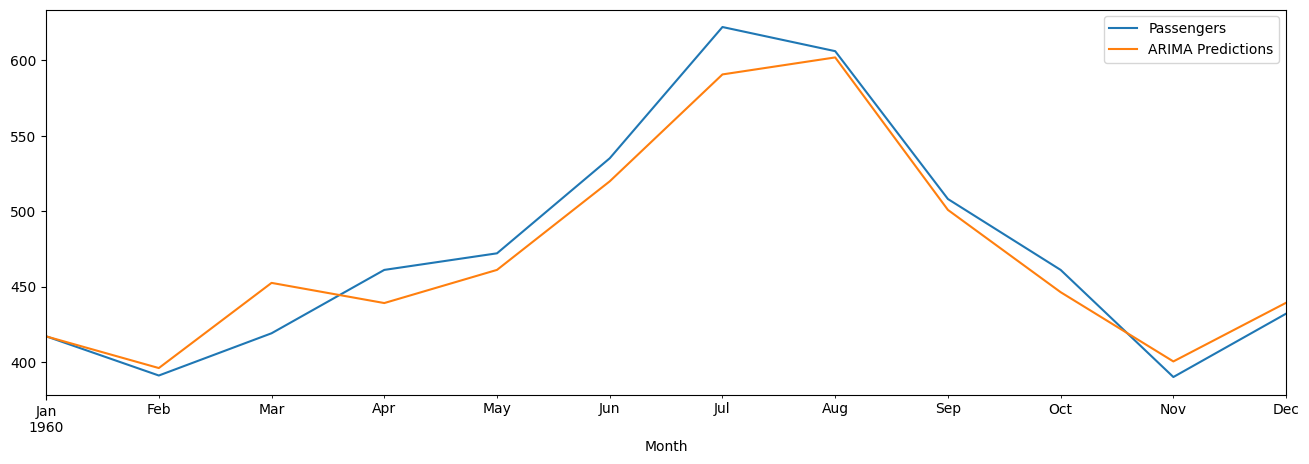

In [13]:
test_data['Passengers'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [14]:
arima_rmse_error = rmse(test_data['Passengers'], arima_pred)
arima_mse_error = arima_rmse_error**2
arima_mae_error = mean_absolute_error(test_data['Passengers'], arima_pred)
mean_value = df['Passengers'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 284.2115800345846
RMSE Error: 16.858575860213833
Mean: 280.2986111111111


In [15]:
global_test_data = test_data.copy()
global_test_data['ARIMA_Predictions'] = arima_pred

rnn

In [16]:
scaler = MinMaxScaler()

scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [17]:
n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [18]:
#rnn_model = Sequential()
#rnn_model.add(SimpleRNN(100, activation='relu', input_shape=(n_input, n_features)))
#rnn_model.add(Dense(1))

rnn_model = tf.keras.Sequential([
    #tf.keras.Input(shape=(n_input, n_features)),
    tf.keras.layers.Conv1D(filters=16, kernel_size=2,
                           strides=1, padding="causal",
                           activation="relu",
                           input_shape=[n_input, n_features]),
    tf.keras.layers.LSTM(80, return_sequences=True),
    tf.keras.layers.LSTM(40),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')

rnn_model.summary()

2023-05-17 04:42:43.705794: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-17 04:42:43.734627: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-17 04:42:43.734865: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-17 04:42:43.735359: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 12, 16)            48        
                                                                 
 lstm (LSTM)                 (None, 12, 80)            31040     
                                                                 
 lstm_1 (LSTM)               (None, 40)                19360     
                                                                 
 dense (Dense)               (None, 40)                1640      
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 52,129
Trainable params: 52,129
Non-trainable params: 0
_________________________________________________________________


In [19]:
rnn_model.fit_generator(generator, epochs=25)

Epoch 1/25


2023-05-17 04:42:46.888464: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


120/120 [==============================] - 4s 6ms/step - loss: 0.0253
Epoch 2/25
120/120 [==============================] - 1s 7ms/step - loss: 0.0165
Epoch 3/25
120/120 [==============================] - 1s 7ms/step - loss: 0.0135
Epoch 4/25
120/120 [==============================] - 1s 7ms/step - loss: 0.0127
Epoch 5/25
120/120 [==============================] - 1s 7ms/step - loss: 0.0117
Epoch 6/25
120/120 [==============================] - 1s 6ms/step - loss: 0.0109
Epoch 7/25
120/120 [==============================] - 1s 7ms/step - loss: 0.0095
Epoch 8/25
120/120 [==============================] - 1s 7ms/step - loss: 0.0051
Epoch 9/25
120/120 [==============================] - 1s 6ms/step - loss: 0.0033
Epoch 10/25
120/120 [==============================] - 1s 7ms/step - loss: 0.0026
Epoch 11/25
120/120 [==============================] - 1s 6ms/step - loss: 0.0031
Epoch 12/25
120/120 [==============================] - 1s 8ms/step - loss: 0.0031
Epoch 13/25
120/120 [===============

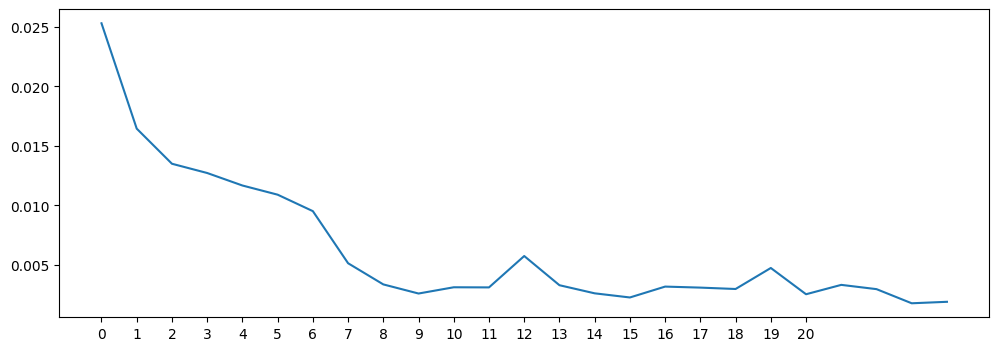

In [20]:
losses_rnn = rnn_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_rnn)),losses_rnn);

In [21]:
RNN_Predictions_scaled = list()

# last n_input elements
batch = scaled_train_data[-n_input:]
print('batch')
print(batch)
print('shape is ', batch.shape)
# shape now is (1, 12, 1)
current_batch = batch.reshape((1, n_input, n_features))
print('current batch')
print(current_batch)
print('shape is ', current_batch.shape)
for i in range(len(test_data)):   
    rnn_pred = rnn_model.predict(current_batch)[0]
    RNN_Predictions_scaled.append(rnn_pred) 
    # first element in current_batch will be gone
    # a new element will be inserted at the end
    current_batch = np.append(current_batch[:,1:,:],[[rnn_pred]],axis=1)
    print('current_batch now\n', current_batch)
    print('current_batch shape\n', current_batch.shape)

batch
[[0.56263736]
 [0.52307692]
 [0.66373626]
 [0.64175824]
 [0.69450549]
 [0.80879121]
 [0.97582418]
 [1.        ]
 [0.78901099]
 [0.66593407]
 [0.56703297]
 [0.66153846]]
shape is  (12, 1)
current batch
[[[0.56263736]
  [0.52307692]
  [0.66373626]
  [0.64175824]
  [0.69450549]
  [0.80879121]
  [0.97582418]
  [1.        ]
  [0.78901099]
  [0.66593407]
  [0.56703297]
  [0.66153846]]]
shape is  (1, 12, 1)
1/1 [==============================] - 0s 489ms/step
current_batch now
 [[[0.52307692]
  [0.66373626]
  [0.64175824]
  [0.69450549]
  [0.80879121]
  [0.97582418]
  [1.        ]
  [0.78901099]
  [0.66593407]
  [0.56703297]
  [0.66153846]
  [0.55903327]]]
current_batch shape
 (1, 12, 1)
1/1 [==============================] - 0s 17ms/step
current_batch now
 [[[0.66373626]
  [0.64175824]
  [0.69450549]
  [0.80879121]
  [0.97582418]
  [1.        ]
  [0.78901099]
  [0.66593407]
  [0.56703297]
  [0.66153846]
  [0.55903327]
  [0.54498565]]]
current_batch shape
 (1, 12, 1)
1/1 [==============

In [22]:
RNN_Predictions_scaled

[array([0.5590333], dtype=float32),
 array([0.54498565], dtype=float32),
 array([0.63224757], dtype=float32),
 array([0.6547806], dtype=float32),
 array([0.7360261], dtype=float32),
 array([0.8549167], dtype=float32),
 array([0.988019], dtype=float32),
 array([1.0218306], dtype=float32),
 array([0.8654516], dtype=float32),
 array([0.7425748], dtype=float32),
 array([0.63456124], dtype=float32),
 array([0.6453523], dtype=float32)]

In [23]:
RNN_Predictions = scaler.inverse_transform(RNN_Predictions_scaled)

In [24]:
global_test_data['RNN_Predictions'] = RNN_Predictions

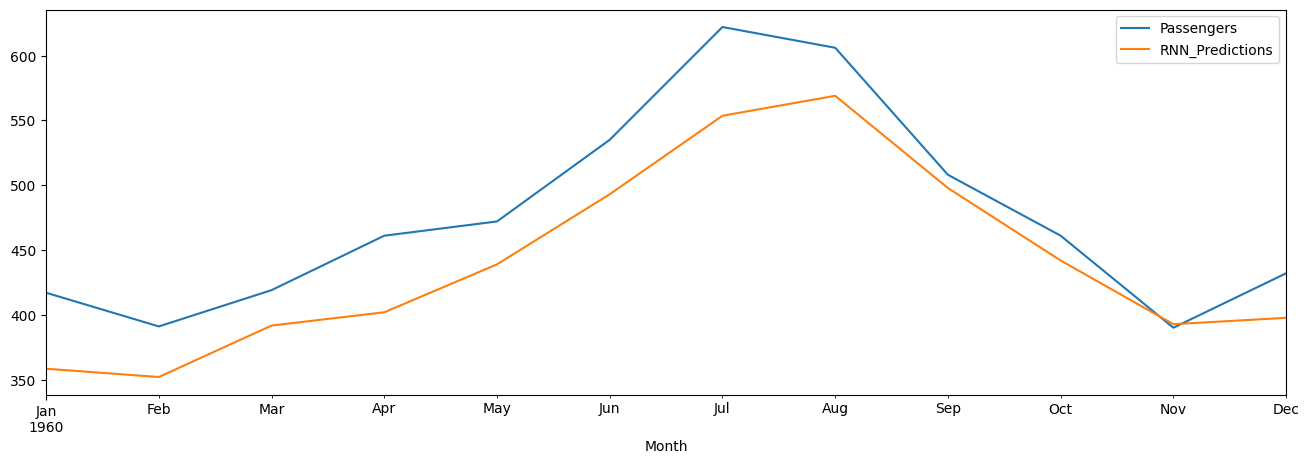

In [25]:
global_test_data['Passengers'].plot(figsize = (16,5), legend=True)
global_test_data['RNN_Predictions'].plot(legend = True);

In [26]:
rnn_rmse_error = rmse(global_test_data['Passengers'], global_test_data["RNN_Predictions"])
rnn_mse_error = rnn_rmse_error**2
rnn_mae_error = mean_absolute_error(global_test_data['Passengers'], global_test_data["RNN_Predictions"])
mean_value = df['Passengers'].mean()

print(f'MSE Error: {rnn_mse_error}\nRMSE Error: {rnn_rmse_error}\nMean: {mean_value}')

MSE Error: 1648.183243883937
RMSE Error: 40.5978231421826
Mean: 280.2986111111111


In [27]:
rmse_errors = [arima_rmse_error, rnn_rmse_error]
mse_errors = [arima_mse_error, rnn_mse_error]
mae_errors = [arima_mae_error, rnn_mae_error]

In [32]:
errors = pd.DataFrame({"Models" : ["ARIMA", "RNN"],"RMSE Error" : rmse_errors, "MSE Error" : mse_errors,"MAE Error": mae_errors})

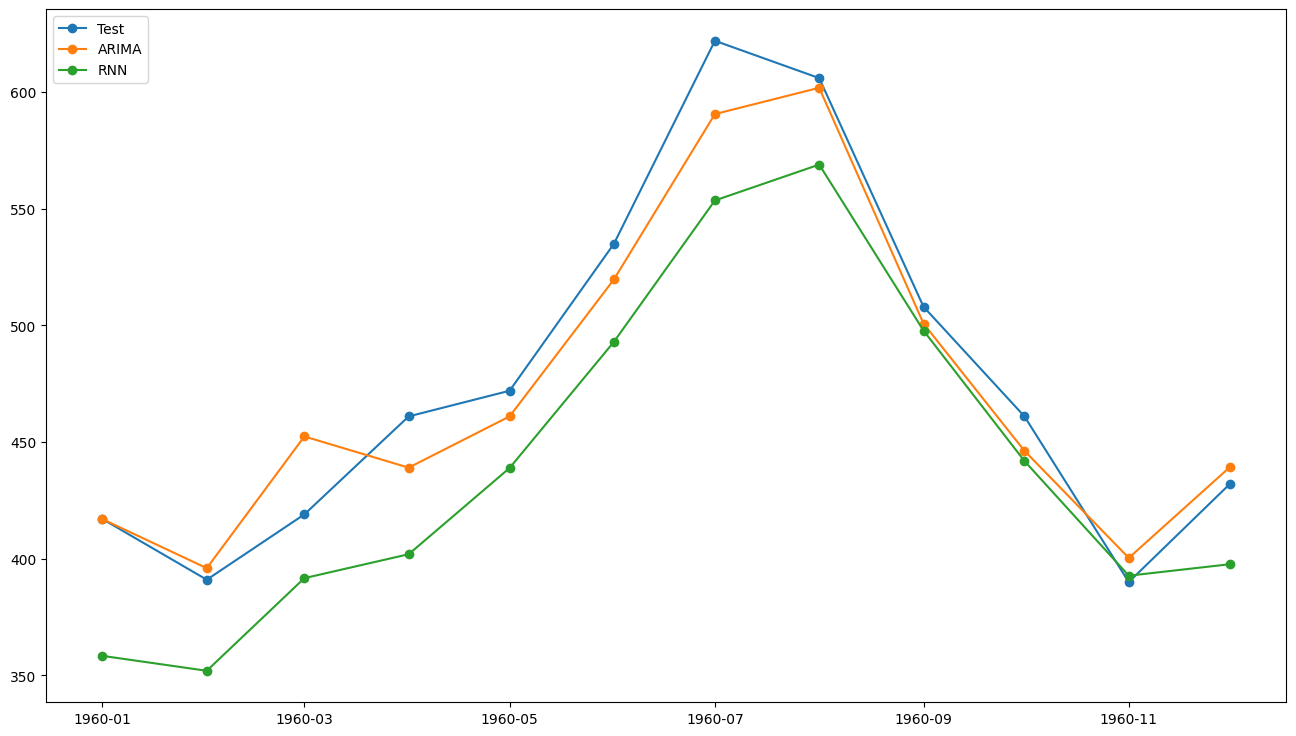

In [29]:
plt.figure(figsize=(16,9))
plt.plot_date(global_test_data.index, global_test_data["Passengers"], linestyle="-")
plt.plot_date(global_test_data.index, global_test_data["ARIMA_Predictions"], linestyle="-")
plt.plot_date(global_test_data.index, global_test_data["RNN_Predictions"], linestyle="-")
plt.legend(["Test", "ARIMA", 'RNN'], loc ="upper left")
plt.show()

In [33]:
print(f"Mean: {global_test_data['Passengers'].mean()}")
errors

Mean: 476.1666666666667


,Models,RMSE Error,MSE Error,MAE Error
0,ARIMA,16.858576,284.211580,13.478785
1,RNN,40.597823,1648.183244,35.929259


In [31]:
global_test_data

,Passengers,ARIMA_Predictions,RNN_Predictions
Month,,,
1960-01-01,417,416.953409,358.360140
1960-02-01,391,395.944863,351.968472
1960-03-01,419,452.401861,391.672643
1960-04-01,461,439.032016,401.925185
1960-05-01,472,461.009247,438.891879
1960-06-01,535,519.714203,492.987095
1960-07-01,622,590.581446,553.548640
1960-08-01,606,601.852058,568.932904
1960-09-01,508,500.769506,497.780466
